In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, sin, cos, sqrt, atan2
import warnings
import folium

# filter out warning messages
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split




In [2]:
df=pd.read_csv(r"D:\DATASET\delivery_dataset\finalTrain.csv")

In [3]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [4]:
df.shape

(45584, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [6]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [7]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


# no need of Delivery_person_Age we can easily drop this

In [8]:
for i in df.columns:
    print(f" no. of unique value in {i}  is   : {df[i].nunique()}")
    print()
    if (df[i].nunique()) < 8:
        print(f"           unique value are : {df[i].unique()}")
        print()
    else:
        pass

 no. of unique value in ID  is   : 45584

 no. of unique value in Delivery_person_ID  is   : 1320

 no. of unique value in Delivery_person_Age  is   : 22

 no. of unique value in Delivery_person_Ratings  is   : 28

 no. of unique value in Restaurant_latitude  is   : 657

 no. of unique value in Restaurant_longitude  is   : 518

 no. of unique value in Delivery_location_latitude  is   : 4373

 no. of unique value in Delivery_location_longitude  is   : 4373

 no. of unique value in Order_Date  is   : 44

 no. of unique value in Time_Orderd  is   : 176

 no. of unique value in Time_Order_picked  is   : 193

 no. of unique value in Weather_conditions  is   : 6

           unique value are : ['Fog' 'Stormy' 'Sandstorms' 'Windy' 'Cloudy' 'Sunny' nan]

 no. of unique value in Road_traffic_density  is   : 4

           unique value are : ['Jam' 'High' 'Medium' 'Low' nan]

 no. of unique value in Vehicle_condition  is   : 4

           unique value are : [2 1 0 3]

 no. of unique value in Type_

In [9]:
feature = []
dtypes = []
count = []
unique = []
missing = []
missing_percentage=[]

for column in df.columns:
    feature.append(column)
    count.append(len(df[column]))
    missing.append(df[column].isnull().sum())
    unique.append(df[column].nunique())
    missing_percentage.append((df[column].isnull().sum() / df.shape[0]) * 100)
    dtypes.append(df[column].dtypes)
    
dataframe=pd.DataFrame({'feature':feature,
             'count':count,
             'missing':missing,
             'nunique':unique,
              'missing_percentage':missing_percentage,
              'dtypes':dtypes
              
             }) 
dataframe.set_index('feature')

,count,missing,nunique,missing_percentage,dtypes
feature,,,,,
ID,45584,0,45584,0.000000,object
Delivery_person_ID,45584,0,1320,0.000000,object
Delivery_person_Age,45584,1854,22,4.067217,float64
Delivery_person_Ratings,45584,1908,28,4.185679,float64
Restaurant_latitude,45584,0,657,0.000000,float64
Restaurant_longitude,45584,0,518,0.000000,float64
Delivery_location_latitude,45584,0,4373,0.000000,float64
Delivery_location_longitude,45584,0,4373,0.000000,float64
Order_Date,45584,0,44,0.000000,object


### will remove the age column ,  age column is not important while analysis

In [10]:
df.drop('Delivery_person_Age',axis=1,inplace=True)


In [11]:
# dropping the id column

df.drop('ID',axis=1,inplace=True)

## changing the datetime column in datetime

In [12]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [13]:
df['Order_Date']

0       2022-12-02
1       2022-02-13
2       2022-04-03
3       2022-02-13
4       2022-02-14
           ...    
45579   2022-03-24
45580   2022-02-16
45581   2022-11-03
45582   2022-07-03
45583   2022-02-03
Name: Order_Date, Length: 45584, dtype: datetime64[ns]

In [14]:

df['year']= df['Order_Date'].dt.year
df['month']= df['Order_Date'].dt.month
df['day']= df['Order_Date'].dt.day

In [15]:
df.head()

,Delivery_person_ID,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),year,month,day
0,DEHRES17DEL01,4.2,30.327968,78.046106,30.397968,78.116106,2022-12-02,21:55,22:10,Fog,...,2,Snack,motorcycle,3.0,No,Metropolitian,46,2022,12,2
1,KOCRES16DEL01,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,15:05,Stormy,...,1,Meal,motorcycle,1.0,No,Metropolitian,23,2022,2,13
2,PUNERES13DEL03,4.7,18.562450,73.916619,18.652450,74.006619,2022-04-03,17:30,17:40,Sandstorms,...,1,Drinks,scooter,1.0,No,Metropolitian,21,2022,4,3
3,LUDHRES15DEL02,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,09:30,Sandstorms,...,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2022,2,13
4,KNPRES14DEL02,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,20:05,Fog,...,1,Snack,scooter,1.0,No,Metropolitian,41,2022,2,14


In [16]:
# removing th eorder_date column

df.drop('Order_Date',axis=1,inplace=True)

In [17]:
# removing the null value in the time ordered column

In [18]:
df.dropna(subset=['Time_Orderd'],inplace=True)

In [19]:
df['Time_Orderd'] = df['Time_Orderd'].str.replace('.', ':')


In [20]:
# Define a lambda function with error handling
def extract_time(x):
    try:
        return x.split(':')[0] + ':' + x.split(':')[1][:2]
    except IndexError:
        return '00:00'

# Apply the lambda function to the Order_Time column
df['Time_Orderd'] = df['Time_Orderd'].apply(extract_time)

In [21]:
# Convert the Order_Time column to a time data type
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S',errors='ignore')


#df['Order_Hour'] = df['Time_Orderd'].dt.hour


In [22]:
df['TimeOrder_Hour']=df['Time_Orderd'].str.split(':',expand=True)[0]


# replacing '0' with '00'  - both indicate 24th hr 
df['TimeOrder_Hour']=df['TimeOrder_Hour'].replace('0','00')

# changing the datatype
df['TimeOrder_Hour']=df['TimeOrder_Hour'].astype('int32')

In [23]:
# order_minute
df['TimeOrder_min']=df['Time_Orderd'].str.split(':',expand=True)[1]

# changing the datatype
df['TimeOrder_min']=df['TimeOrder_min'].astype('int32')

In [24]:
df.head()

,Delivery_person_ID,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,...,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min
0,DEHRES17DEL01,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,Jam,...,motorcycle,3.0,No,Metropolitian,46,2022,12,2,21,55
1,KOCRES16DEL01,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,High,...,motorcycle,1.0,No,Metropolitian,23,2022,2,13,14,55
2,PUNERES13DEL03,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,Medium,...,scooter,1.0,No,Metropolitian,21,2022,4,3,17,30
3,LUDHRES15DEL02,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,Low,...,motorcycle,0.0,No,Metropolitian,20,2022,2,13,9,20
4,KNPRES14DEL02,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,Jam,...,scooter,1.0,No,Metropolitian,41,2022,2,14,19,50


# time_order_picked

In [25]:
df['Time_Order_picked'] = df['Time_Order_picked'].str.replace('.', ':')

In [26]:
# Define a lambda function with error handling
def extract_time(x):
    try:
        return x.split(':')[0] + ':' + x.split(':')[1][:2]
    except IndexError:
        return '00:00'

# Apply the lambda function to the Order_Time column
df['Time_Order_picked'] = df['Time_Order_picked'].apply(extract_time)

In [27]:
# Convert the Order_Time column to a time data type
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S',errors='ignore')


#df['Order_Hour'] = df['Time_Orderd'].dt.hour


In [28]:
df['Time_Order_picked_Hour']=df['Time_Order_picked'].str.split(':',expand=True)[0]



# changing the datatype
df['Time_Order_picked_Hour']=df['Time_Order_picked_Hour'].astype('int32')

In [29]:

# order_minute
df['Time_Order_picked_min']=df['Time_Order_picked'].str.split(':',expand=True)[1]

# changing the datatype
df['Time_Order_picked_min']=df['Time_Order_picked_min'].astype('int32')

### extracting city from delivery_person_id

In [30]:
# spilliting the Delivery_person_id  on the bases of "RES", this will give us the city name of delivery

df['Delivery_city']=df['Delivery_person_ID'].str.split('RES',expand=True)[0]

In [31]:

df.head()

,Delivery_person_ID,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,...,City,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,Delivery_city
0,DEHRES17DEL01,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,Jam,...,Metropolitian,46,2022,12,2,21,55,22,10,DEH
1,KOCRES16DEL01,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,High,...,Metropolitian,23,2022,2,13,14,55,15,5,KOC
2,PUNERES13DEL03,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,Medium,...,Metropolitian,21,2022,4,3,17,30,17,40,PUNE
3,LUDHRES15DEL02,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,Low,...,Metropolitian,20,2022,2,13,9,20,9,30,LUDH
4,KNPRES14DEL02,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,Jam,...,Metropolitian,41,2022,2,14,19,50,20,5,KNP


In [32]:
df['Delivery_city'].unique()

array(['DEH', 'KOC', 'PUNE', 'LUDH', 'KNP', 'MUM', 'MYS', 'HYD', 'KOL',
       'RANCHI', 'COIMB', 'CHEN', 'JAP', 'SUR', 'BANG', 'GOA', 'AURG',
       'AGR', 'VAD', 'ALH', 'BHP', 'INDO'], dtype=object)

In [33]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Time_Orderd', 'Time_Order_picked',
       'Weather_conditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Time_taken (min)', 'year', 'month', 'day', 'TimeOrder_Hour',
       'TimeOrder_min', 'Time_Order_picked_Hour', 'Time_Order_picked_min',
       'Delivery_city'],
      dtype='object')

In [34]:
df['Restaurant_latitude'].dtypes

dtype('float64')

In [35]:
df['Delivery_person_Ratings'].isnull().sum()

268

# filling the null value with the mean of that person id

In [36]:
rating_map = round(df.groupby('Delivery_person_ID')['Delivery_person_Ratings'].mean(),1).to_dict()

df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].fillna(df['Delivery_person_ID'].map(rating_map))

# fillup the missing value in delivery_person_rating with the help of mean value of every delivery_person_id


In [37]:
df['Delivery_person_Ratings'].isnull().sum()

# now the missing value is null

0

### lattitude and longitude 

In [38]:
# latitude of india is 8°4` N  to 37°6` North
# longitude of india is 68°7` E to 97°25` East



# this data set is realted to india. but in some of latitidude is given in negative(-), negative lattitude is related
# to indian ocean ..

# so that there is much chances that negative sign in lattitude is by mistake

In [39]:
df['Restaurant_latitude'] = df['Restaurant_latitude'].abs()

##### To calculate the distance between two points on a sphere (such as the Earth), we can use the Haversine formula

In [40]:
import math

def distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    R = 6371.0 # Earth's radius in km
    dist = R * c
    
    return dist
df['distance'] = df.apply(lambda row: distance(row['Restaurant_latitude'], row['Restaurant_longitude'], row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)

In [41]:
folium.Map(tiles="cartodb positron")

# working with map

In [42]:
df.groupby(['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'])['distance'].max().head(40)

Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  Delivery_location_longitude
0.000000             0.000000              0.010000                    0.010000                        1.572534
                                           0.020000                    0.020000                        3.145067
                                           0.030000                    0.030000                        4.717601
                                           0.040000                    0.040000                        6.290135
                                           0.050000                    0.050000                        7.862668
                                           0.060000                    0.060000                        9.435202
                                           0.070000                    0.070000                       11.007735
                                           0.080000                    0.080000                       12.580268
     

In [43]:
# droping those lattitude and longitude which are less than and above to
# latitude of india is 8°4` N  to 37°6` North
# longitude of india is 68°7` E to 97°25` East

In [44]:
df[(df['Restaurant_latitude'] < 8) & (df['Delivery_location_latitude'] < 8)].shape

# these 3509 record is of no use. bcz the wrong lattitude is mention

(3509, 26)

In [45]:
# droping  where  restaurant_lattitude and delivery_location_latitude less than 8

df = df.drop(df[(df['Restaurant_latitude'] < 8) & (df['Delivery_location_latitude'] < 8)].index)

In [46]:
df[(df['Restaurant_latitude'] > 37) & (df['Delivery_location_latitude'] > 37)]

,Delivery_person_ID,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,...,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,Delivery_city,distance


In [47]:
df[(df['Restaurant_longitude'] < 68) & (df['Delivery_location_longitude'] < 68)]

,Delivery_person_ID,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,...,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,Delivery_city,distance


In [48]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Time_Orderd', 'Time_Order_picked',
       'Weather_conditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Time_taken (min)', 'year', 'month', 'day', 'TimeOrder_Hour',
       'TimeOrder_min', 'Time_Order_picked_Hour', 'Time_Order_picked_min',
       'Delivery_city', 'distance'],
      dtype='object')

### minimum distance 

In [49]:
min_distance=df.groupby('distance')[['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude',
                        'Delivery_location_longitude']].max().sort_values(by='distance',ascending=True).head(1)
min_distance

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
distance,,,,
1.465067,30.914057,75.83982,30.924057,75.84982


In [50]:
import folium
from branca.element import Figure
fig2=Figure(width=850,height=550)

# Create a map object centered on a specific location
m = folium.Map(location=[30.914057, 75.83982], zoom_start=12)

# Add a marker for the restaurant location
folium.Marker(location=[30.914057, 75.83982], popup="Restaurant",icon=folium.Icon(color='purple',prefix='fa',icon='anchor')).add_to(m)

# Add a marker for the delivery location
folium.Marker(location=[30.924057, 75.84982], popup="Delivery").add_to(m)

# Draw a line between the two locations
folium.PolyLine(locations=[[30.914057, 75.83982], [30.924057, 75.84982]], color='red').add_to(m)

# Display the map

fig2.add_child(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('Stamen Water Color').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.TileLayer('cartodbdark_matter').add_to(m)
folium.LayerControl().add_to(m)
m




### maximum distance

In [51]:
max_distance=df.groupby('distance')[['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude',
                        'Delivery_location_longitude']].max().sort_values(by='distance',ascending=False).head(1)
max_distance

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
distance,,,,
20.969489,25.443994,81.860187,25.583994,82.000187


In [52]:
 tooltips=f"Distance: {df['distance'].max()} km"

In [53]:
import folium
from branca.element import Figure
fig2=Figure(width=850,height=550)

# Create a map object centered on a specific location
m = folium.Map(location=[25.443994, 81.860187], zoom_start=12)

# Add a marker for the restaurant location
folium.Marker(location=[25.443994, 81.860187], popup="Restaurant",icon=folium.Icon(color='purple',prefix='fa',icon='anchor')).add_to(m)

# Add a marker for the delivery location
folium.Marker(location=[25.583994, 82.000187], popup="Delivery").add_to(m)

# Draw a line between the two locations
folium.PolyLine(locations=[[25.443994, 81.860187], [25.583994,82.000187]], color='red',tooltip=tooltips).add_to(m)

# Display the map

fig2.add_child(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('Stamen Water Color').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.TileLayer('cartodbdark_matter').add_to(m)
folium.LayerControl().add_to(m)
m

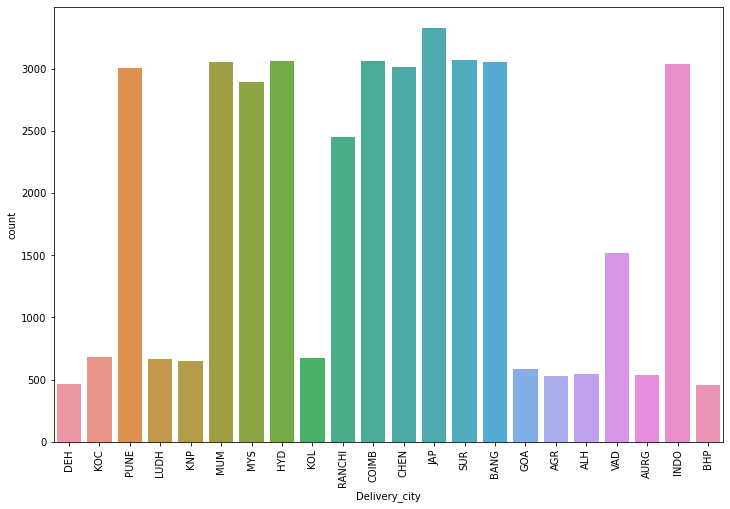

In [54]:

plt.figure(figsize=(12,8))
sns.countplot(df['Delivery_city'])
plt.xticks(rotation='vertical')
plt.show()

In [55]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Time_Orderd', 'Time_Order_picked',
       'Weather_conditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Time_taken (min)', 'year', 'month', 'day', 'TimeOrder_Hour',
       'TimeOrder_min', 'Time_Order_picked_Hour', 'Time_Order_picked_min',
       'Delivery_city', 'distance'],
      dtype='object')

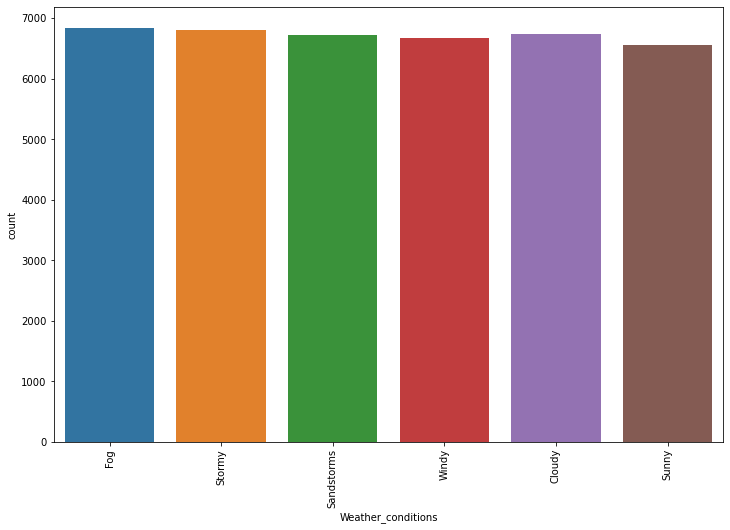

In [56]:

plt.figure(figsize=(12,8))
sns.countplot(df['Weather_conditions'])
plt.xticks(rotation='vertical')
plt.show()

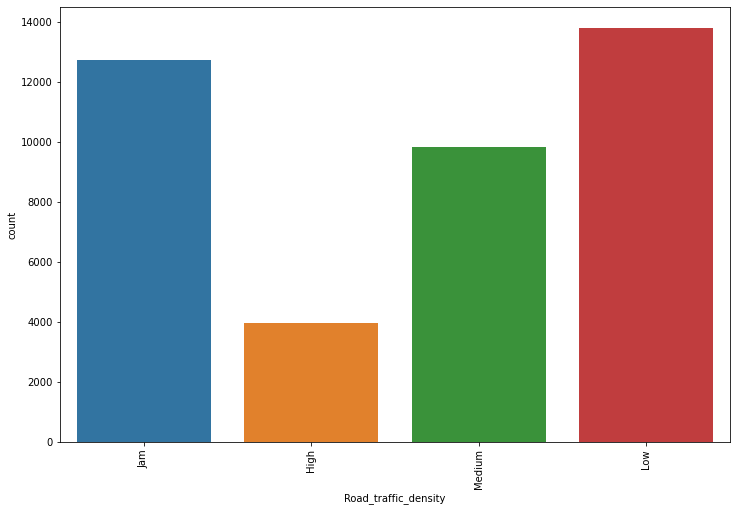

In [57]:

plt.figure(figsize=(12,8))
sns.countplot(df['Road_traffic_density'])
plt.xticks(rotation='vertical')
plt.show()

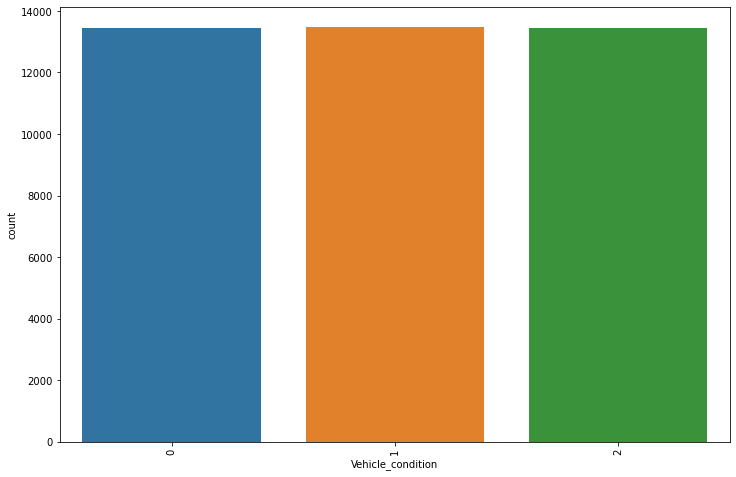

In [58]:

plt.figure(figsize=(12,8))
sns.countplot(df['Vehicle_condition'])
plt.xticks(rotation='vertical')
plt.show()

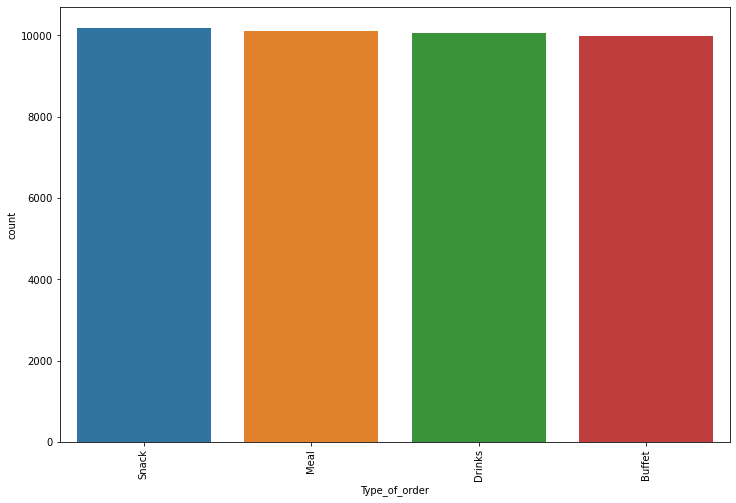

In [59]:

plt.figure(figsize=(12,8))
sns.countplot(df['Type_of_order'])
plt.xticks(rotation='vertical')
plt.show()

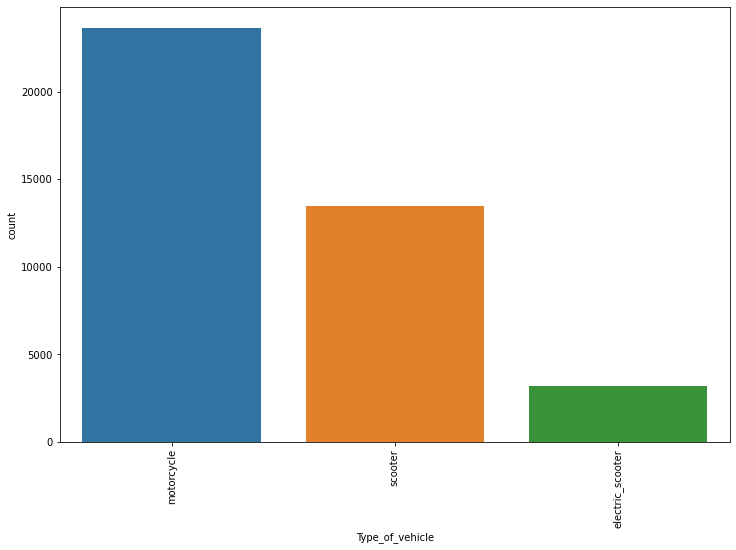

In [60]:

plt.figure(figsize=(12,8))
sns.countplot(df['Type_of_vehicle'])
plt.xticks(rotation='vertical')
plt.show()

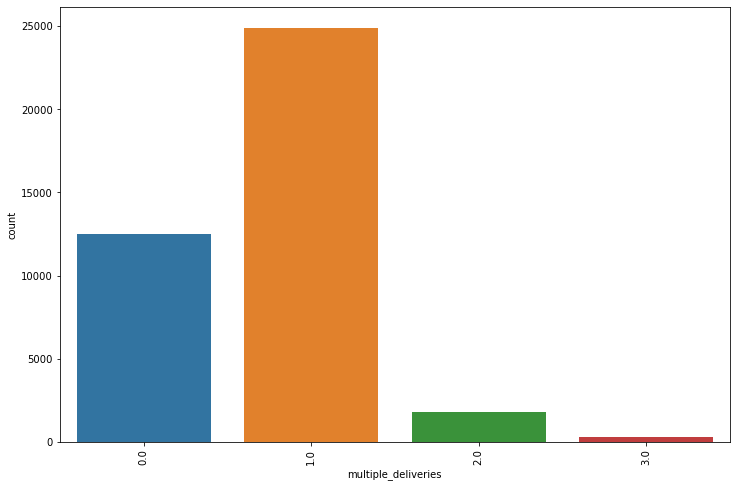

In [61]:

plt.figure(figsize=(12,8))
sns.countplot(df['multiple_deliveries'])
plt.xticks(rotation='vertical')
plt.show()

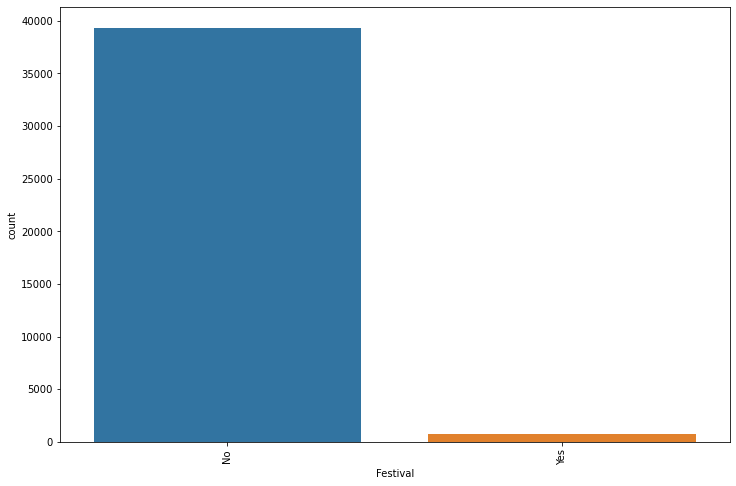

In [62]:

plt.figure(figsize=(12,8))
sns.countplot(df['Festival'])
plt.xticks(rotation='vertical')
plt.show()

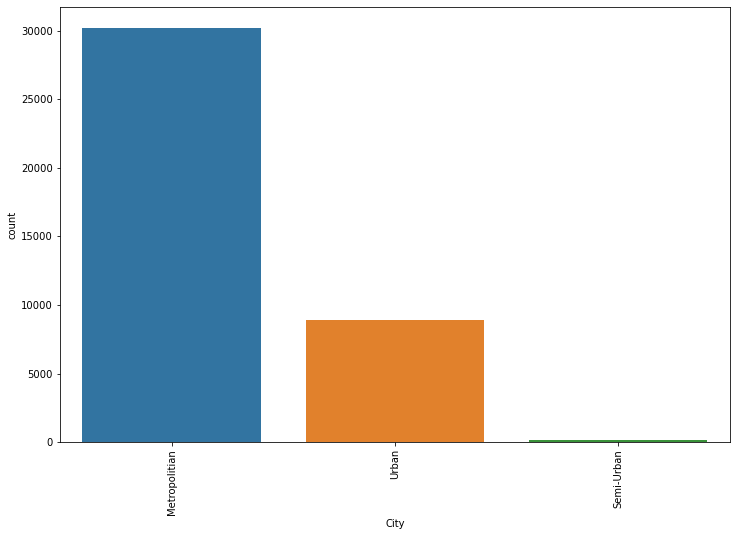

In [63]:

plt.figure(figsize=(12,8))
sns.countplot(df['City'])
plt.xticks(rotation='vertical')
plt.show()

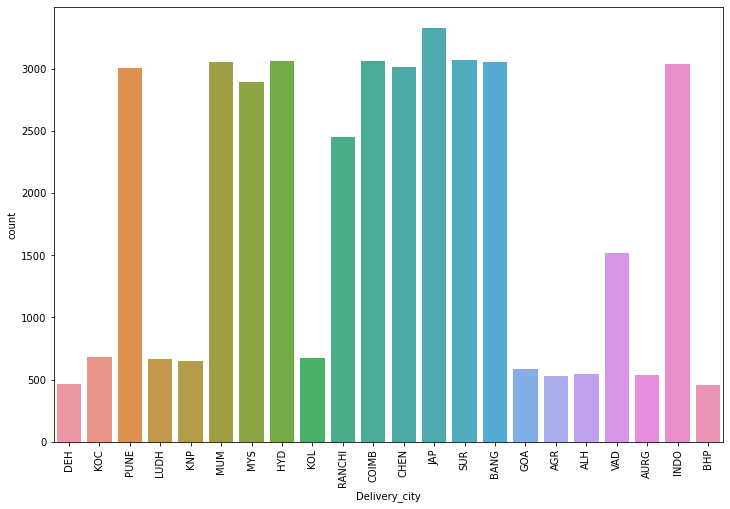

In [64]:

plt.figure(figsize=(12,8))
sns.countplot(df['Delivery_city'])
plt.xticks(rotation='vertical')
plt.show()

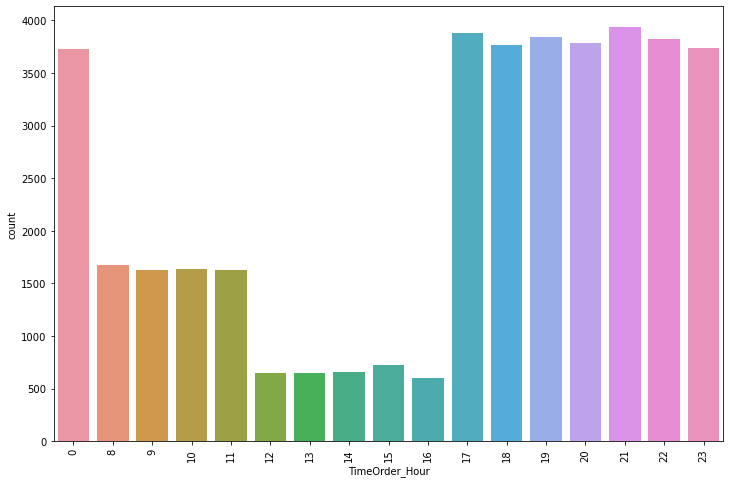

In [65]:
plt.figure(figsize=(12,8))

sns.countplot(df['TimeOrder_Hour'])
plt.xticks(rotation='vertical')
plt.show()

In [66]:
df.isnull().sum()


Delivery_person_ID                0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Time_Orderd                       0
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             855
Festival                        206
City                           1059
Time_taken (min)                  0
year                              0
month                             0
day                               0
TimeOrder_Hour                    0
TimeOrder_min                     0
Time_Order_picked_Hour            0
Time_Order_picked_min             0
Delivery_city                     0
distance                          0
dtype: int64

In [67]:
df['multiple_deliveries'].dtypes

dtype('float64')

In [68]:
#dropping delivery_person_id

df.drop('Delivery_person_ID',axis=1,inplace=True)

In [69]:
df.drop(['Time_Orderd','Time_Order_picked'],axis=1,inplace=True)


# dropping time ordered and time order_picked

In [70]:
df.columns

Index(['Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'year', 'month', 'day', 'TimeOrder_Hour',
       'TimeOrder_min', 'Time_Order_picked_Hour', 'Time_Order_picked_min',
       'Delivery_city', 'distance'],
      dtype='object')

In [71]:
df.head()

,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,...,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,Delivery_city,distance
0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,motorcycle,...,46,2022,12,2,21,55,22,10,DEH,10.280582
1,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,motorcycle,...,23,2022,2,13,14,55,15,5,KOC,6.242319
2,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,Drinks,scooter,...,21,2022,4,3,17,30,17,40,PUNE,13.787860
3,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,motorcycle,...,20,2022,2,13,9,20,9,30,LUDH,2.930258
4,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,scooter,...,41,2022,2,14,19,50,20,5,KNP,19.396618


In [72]:
df.dtypes

Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Weather_conditions              object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries            float64
Festival                        object
City                            object
Time_taken (min)                 int64
year                             int64
month                            int64
day                              int64
TimeOrder_Hour                   int32
TimeOrder_min                    int32
Time_Order_picked_Hour           int32
Time_Order_picked_min            int32
Delivery_city                   object
distance                       float64
dtype: object

In [73]:
num_col=[feature for feature in df.columns if df[feature].dtypes != 'O']
cat_col=[feature for feature in df.columns if df[feature].dtypes == 'O']

In [74]:
num_col

['Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Vehicle_condition',
 'multiple_deliveries',
 'Time_taken (min)',
 'year',
 'month',
 'day',
 'TimeOrder_Hour',
 'TimeOrder_min',
 'Time_Order_picked_Hour',
 'Time_Order_picked_min',
 'distance']

In [75]:
cat_col

['Weather_conditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City',
 'Delivery_city']

# spliting into X and y


In [76]:
X=df.drop('distance',axis=1)
y=df['distance']

In [77]:
df[cat_col].head()

,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City,Delivery_city
0,Fog,Jam,Snack,motorcycle,No,Metropolitian,DEH
1,Stormy,High,Meal,motorcycle,No,Metropolitian,KOC
2,Sandstorms,Medium,Drinks,scooter,No,Metropolitian,PUNE
3,Sandstorms,Low,Buffet,motorcycle,No,Metropolitian,LUDH
4,Fog,Jam,Snack,scooter,No,Metropolitian,KNP


In [78]:
df[df['Road_traffic_density']=='Low']

,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,...,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,Delivery_city,distance
3,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,motorcycle,...,20,2022,2,13,9,20,9,30,LUDH,2.930258
11,4.7,23.357804,85.325146,23.487804,85.455146,Sandstorms,Low,2,Meal,electric_scooter,...,26,2022,10,3,22,30,22,45,RANCHI,19.618739
12,5.0,11.003669,76.976494,11.013669,76.986494,Sandstorms,Low,1,Snack,motorcycle,...,20,2022,11,3,8,15,8,30,COIMB,1.558132
17,4.3,21.160522,72.771477,21.250522,72.861477,Cloudy,Low,1,Drinks,scooter,...,38,2022,12,3,23,20,23,30,SUR,13.682045
19,4.8,18.514210,73.838429,18.624210,73.948429,Windy,Low,2,Buffet,electric_scooter,...,12,2022,2,4,23,35,23,45,PUNE,16.853619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45569,4.9,11.025083,77.015393,11.045083,77.035393,Windy,Low,1,Snack,motorcycle,...,26,2022,11,3,10,25,10,40,COIMB,3.116127
45571,4.9,12.297954,76.665169,12.317954,76.685169,Sandstorms,Low,1,Snack,scooter,...,26,2022,5,4,9,10,9,15,MYS,3.109134
45573,4.6,18.562450,73.916619,18.582450,73.936619,Cloudy,Low,0,Meal,motorcycle,...,20,2022,1,4,0,37,9,15,PUNE,3.064267
45575,4.8,13.022394,80.242439,13.042394,80.262439,Sandstorms,Low,2,Drinks,electric_scooter,...,20,2022,5,4,9,35,9,50,CHEN,3.104827


This ranking is based on the potential danger and impact each condition may have on daily activities and travel. Stormy conditions can bring heavy rain, strong winds, and lightning, posing the highest risk. Sandstorms can cause respiratory problems and limit visibility, while fog and windy conditions can make driving hazardous. Cloudy conditions can indicate upcoming storms or weather changes, and sunny conditions are generally considered the least severe.

In [79]:
Road_traffic_density=['Low','Medium','High','Jam']
Weather_conditions=['Sunny','Cloudy','Windy','Fog','Sandstorms','Stormy']

In [80]:
categorical_column=['Type_of_order','Type_of_vehicle','Festival','City','Delivery_city']
ordinal_encod=['Road_traffic_density','Weather_conditions']
numerical_column=['Delivery_person_Ratings','Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude',
                  'Delivery_location_longitude','Vehicle_condition','multiple_deliveries','Time_taken (min)','year',
                  'month','day','TimeOrder_Hour','TimeOrder_min','Time_Order_picked_Hour','Time_Order_picked_min',]

In [81]:
# numerical pipeline

numerical_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='constant',fill_value=0)),
    ('scaler',StandardScaler(with_mean=False))
])

# categorical pipeline

categorical_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore')),
    ('scaler',StandardScaler(with_mean=False))
])


# ordinal pipeline

ordianl_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('ordinal',OrdinalEncoder(categories=[Road_traffic_density,Weather_conditions])),
    ('scaler',StandardScaler(with_mean=False))   
])

In [82]:
preprocessor =ColumnTransformer([
    ('numerical_pipeline',numerical_pipeline,numerical_column),
    ('categorical_pipeline',categorical_pipeline,categorical_column),
    ('ordianl_pipeline',ordianl_pipeline,ordinal_encod)
])

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [84]:
X_train=preprocessor.fit_transform(X_train)

In [85]:
X_test=preprocessor.transform(X_test)

In [86]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor 

from xgboost import XGBRegressor



from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [87]:
def evaluate_reg(true, predicted):
    r2 = r2_score(true, predicted) # Calculate r2 score
    MAE = mean_absolute_error(true, predicted) # Calculate MAE
    MSE = mean_squared_error(true, predicted) # Calculate MSE
    rmse = np.sqrt(mean_squared_error(true, predicted))
   
    return r2, MAE , MSE,rmse

In [92]:
models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "linear Regression": LinearRegression(),
    "Ridge":Ridge(),
    "XGBRegressor": XGBRegressor(), 
  
}

r2_list=[]
mse_list=[]
models_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    

    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)



    # Test set performance
    r2,MAE,MSE,rmse=evaluate_reg(y_test, y_test_pred)
    r2_train,MAE_train,MSE_train,rmse_train=evaluate_reg(y_train, y_train_pred)
    

    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    

    
    print('Model performance for Test set')
    print('- r2_score: {:.4f}'.format(r2))
    print('- MAE: {:.4f}'.format(MAE))
    print('- MSE: {:.4f}'.format(MSE))
    print('- rmse: {:.4f}'.format(rmse))
    r2_list.append(r2)
    mse_list.append(MSE)
    
    print('-'*35)
    
    
        
    print('Model performance for train set')
    print('- r2_score: {:.4f}'.format(r2_train))
    print('- MAE: {:.4f}'.format(MAE_train))
    print('- MSE: {:.4f}'.format(MSE_train))
    print('- rmse: {:.4f}'.format(rmse_train))
  
   
    


    print('='*35)
    print('='*35)
    print('\n')
    
    
    



 

Random Forest
Model performance for Test set
- r2_score: 0.9790
- MAE: 0.3905
- MSE: 0.6656
- rmse: 0.8158
-----------------------------------
Model performance for train set
- r2_score: 0.9969
- MAE: 0.1499
- MSE: 0.0956
- rmse: 0.3092


Decision Tree
Model performance for Test set
- r2_score: 0.9078
- MAE: 0.7202
- MSE: 2.9266
- rmse: 1.7107
-----------------------------------
Model performance for train set
- r2_score: 1.0000
- MAE: 0.0000
- MSE: 0.0000
- rmse: 0.0000


Gradient Boosting
Model performance for Test set
- r2_score: 0.7825
- MAE: 1.9055
- MSE: 6.9029
- rmse: 2.6273
-----------------------------------
Model performance for train set
- r2_score: 0.7822
- MAE: 1.9006
- MSE: 6.8013
- rmse: 2.6079


linear Regression
Model performance for Test set
- r2_score: 0.9997
- MAE: 0.0640
- MSE: 0.0085
- rmse: 0.0924
-----------------------------------
Model performance for train set
- r2_score: 0.9997
- MAE: 0.0639
- MSE: 0.0084
- rmse: 0.0915


Ridge
Model performance for Test set

In [93]:
Results = pd.DataFrame(list(zip(models_list, r2_list)), columns=['Model Name', 'r2_score'])
Results.sort_values(by=["r2_score"],ascending=False)

,Model Name,r2_score
3,linear Regression,0.999731
5,XGBRegressor,0.982308
0,Random Forest,0.979026
4,Ridge,0.910514
1,Decision Tree,0.907780
2,Gradient Boosting,0.782479


In [95]:
Results = pd.DataFrame(list(zip(models_list, mse_list)), columns=['Model Name', 'Mse'])
Results.sort_values(by=["Mse"],ascending=False)

,Model Name,Mse
2,Gradient Boosting,6.902949
1,Decision Tree,2.926555
4,Ridge,2.839801
0,Random Forest,0.665601
5,XGBRegressor,0.561452
3,linear Regression,0.008534


# best model 

# Linear regression with 99% accuracy